In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = Path('../dataset/')
np.random.seed(42)
data = ImageDataBunch.from_folder(path=path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

['deer', 'gazelle', 'unicorn']


(3, 3)

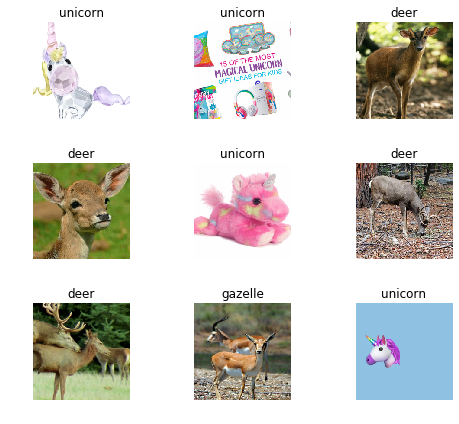

In [5]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
len(data.classes),data.c

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.144500,0.421023,0.114583,00:09
1,0.694270,0.179526,0.072917,00:05
2,0.513360,0.159622,0.062500,00:05
3,0.407013,0.151283,0.052083,00:06


In [9]:
learn.save('stage-1')

# Examine losses

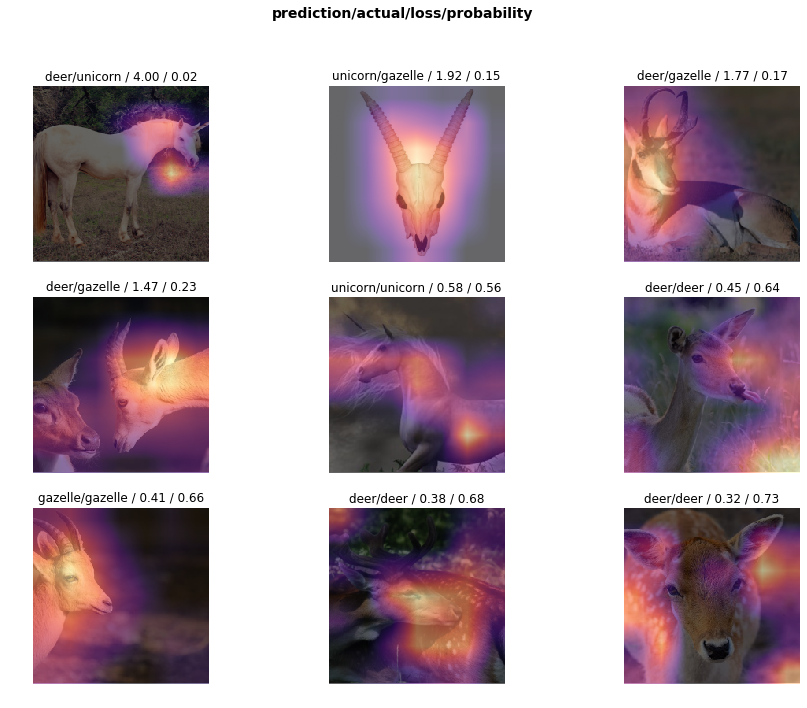

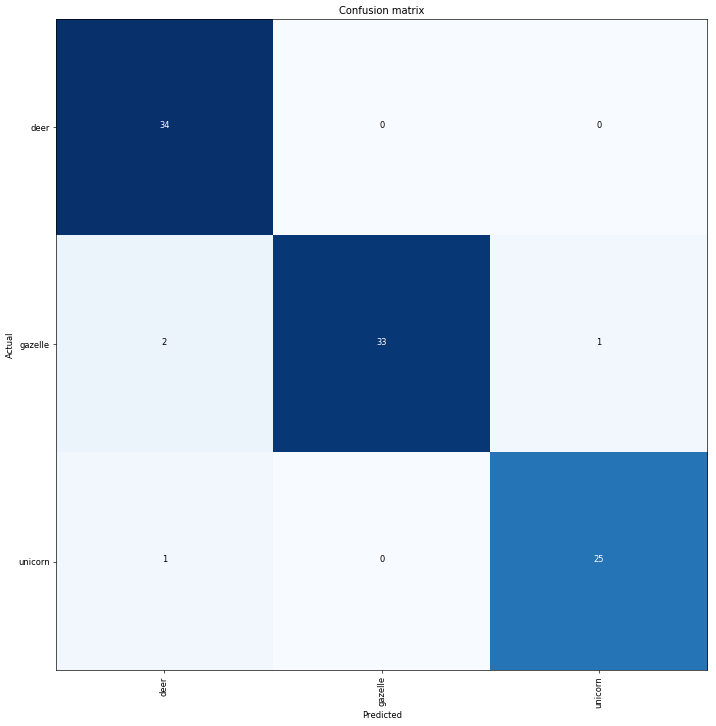

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# improve model

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


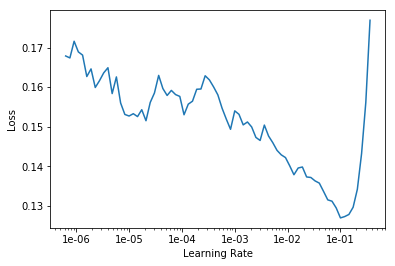

In [12]:
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.127343,0.146237,0.052083,00:06
1,0.130924,0.136309,0.052083,00:06
2,0.119425,0.135303,0.052083,00:06
3,0.110467,0.136104,0.041667,00:06
4,0.104763,0.136107,0.041667,00:06
5,0.105344,0.137442,0.041667,00:06


# restore stage1

In [16]:
learn.load('stage-1');

Export model

In [19]:
learn.export('../model/model_with_unicorn.pkl')

# prediction example

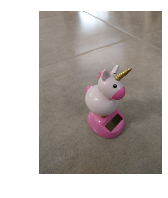

In [20]:
path = Path()
img2 = open_image('/home/yonigo10/WhatsApp Image 2019-04-20 at 12.09.17.jpeg')
img2.show()

In [21]:
learn2 = load_learner('../model/', 'model_with_unicorn.pkl')

In [22]:
pred_class,pred_idx,outputs = learn2.predict(img2)
pred_class,outputs

(Category unicorn, tensor([1.7945e-05, 7.7611e-05, 9.9990e-01]))

[PosixPath('../model'), PosixPath('../nbs'), PosixPath('../dataset')]